In [1]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from IPython.display import Image, display

import sys
sys.path.append('..')
import helpers, datasets, surfaces, matrices

sns.set_style('ticks')

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


Create LTC matrix using the homotopic Yan 1000 parcellation

In [2]:
ltc = matrices.MicrostructuralCovarianceMatrix('thickness', parcellation_name='yan1000')

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-yan1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


Calculate left- and right-hemisphere LTC gradients

In [3]:
lh_ltcg = surfaces.MicrostructuralCovarianceGradients(ltc, hemi='L')
rh_ltcg = surfaces.MicrostructuralCovarianceGradients(ltc, hemi='R')

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


Identify shared parcels

In [10]:
lh_parcels = lh_ltcg.parcellated_data.index.str.replace('L', '')
rh_parcels = rh_ltcg.parcellated_data.index.str.replace('R', '')
shared_parcels = lh_parcels.intersection(rh_parcels)

lh_diff_parcels = lh_ltcg.parcellated_data.index.difference('L' + shared_parcels)
rh_diff_parcels = rh_ltcg.parcellated_data.index.difference('R' + shared_parcels)

lh_ltcg_shared = copy.deepcopy(lh_ltcg)
rh_ltcg_shared = copy.deepcopy(rh_ltcg)

lh_ltcg_shared.parcellated_data.loc[lh_diff_parcels] = np.NaN
rh_ltcg_shared.parcellated_data.loc[rh_diff_parcels] = np.NaN
lh_ltcg_shared.parcellated_data = lh_ltcg_shared.parcellated_data.dropna()
rh_ltcg_shared.parcellated_data = rh_ltcg_shared.parcellated_data.dropna()

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/brainspace/plotting/surface_plotting.py:437: RuntimeWarning: Running plot_hemispheres without a display may result in a crash. For a workaround please consult https://github.com/MICA-MNI/BrainSpace/issues/66. To suppress this warning set suppress_warnings=True.
  warnings.warn(


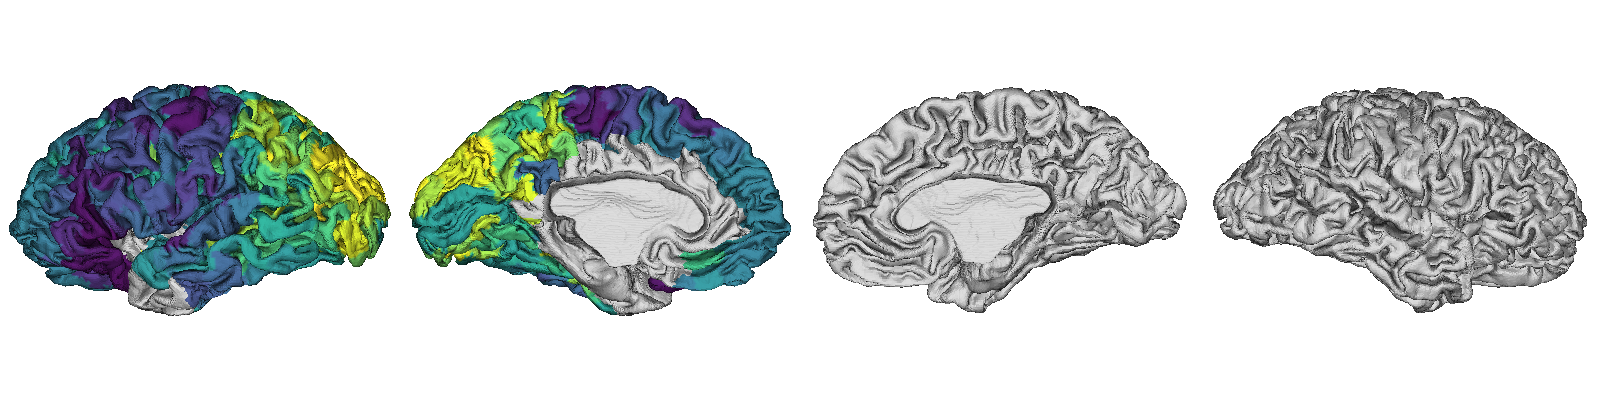

In [7]:
lh_ltcg_shared.plot(columns=['LTC G1'])

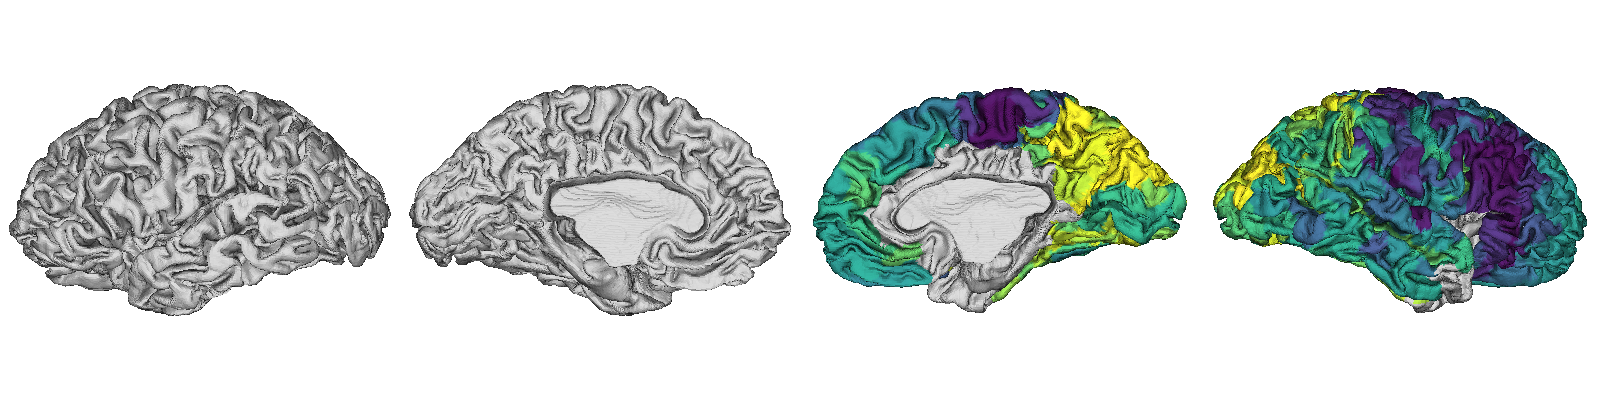

In [8]:
rh_ltcg_shared.plot(columns=['LTC G1'])

Calculate left and right correlation

In [9]:
# pretend that right parcels are on left for matching parcel labels in X and Y
rh_ltcg_shared.parcellated_data.index = rh_ltcg_shared.parcellated_data.index.str.replace('R', 'L')

Calculating correlations with variogram test (parcellated)
Creating 1000 surrogates based on variograms in /home/asaberi/laminar_organization/code/../output/ltc/parc-yan1000_curv-smooth-10_exc-adysgranular_metric-parcor/gradients_approach-pca_kernel-normalized_angle_sparsity-09_n-10/hemi-L/variogram_surrogates_LTC G1_nperm-1000_nparcels-439.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/distance/geodesic_distance_matrix_parc-yan1000_approach-center-to-center.npz


(          LTC G1
 LTC G1  0.735993,
         LTC G1
 LTC G1     0.0)

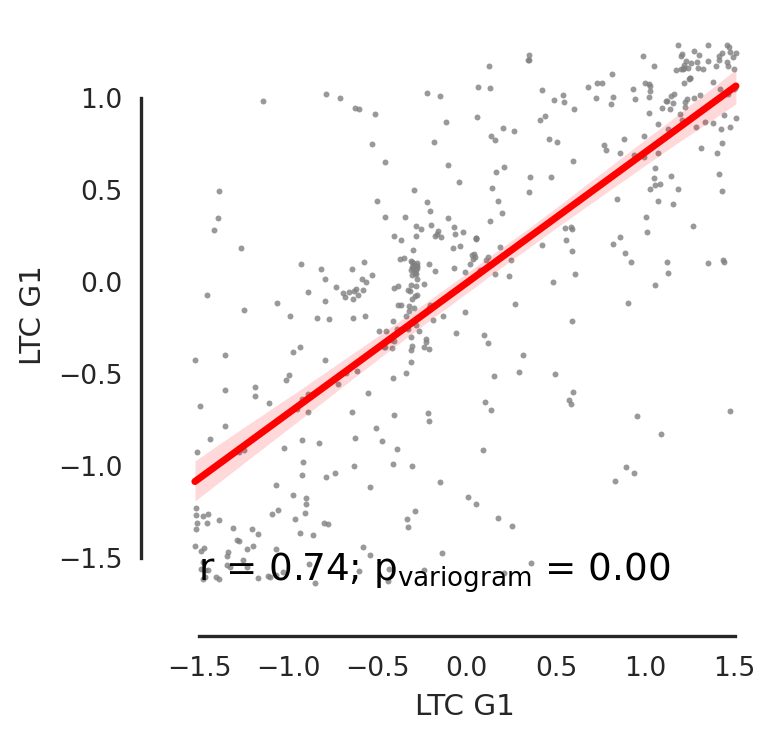

In [13]:
lh_ltcg_shared.correlate(rh_ltcg_shared, x_columns=['LTC G1'], y_columns=['LTC G1'])